<a href="https://colab.research.google.com/github/sabahat121/AI-ML-Internship-Tasks/blob/main/Task_3__Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

In [6]:
import seaborn as sns

In [7]:
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('HeartDiseaseTrain-Test.csv')

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

<Axes: >

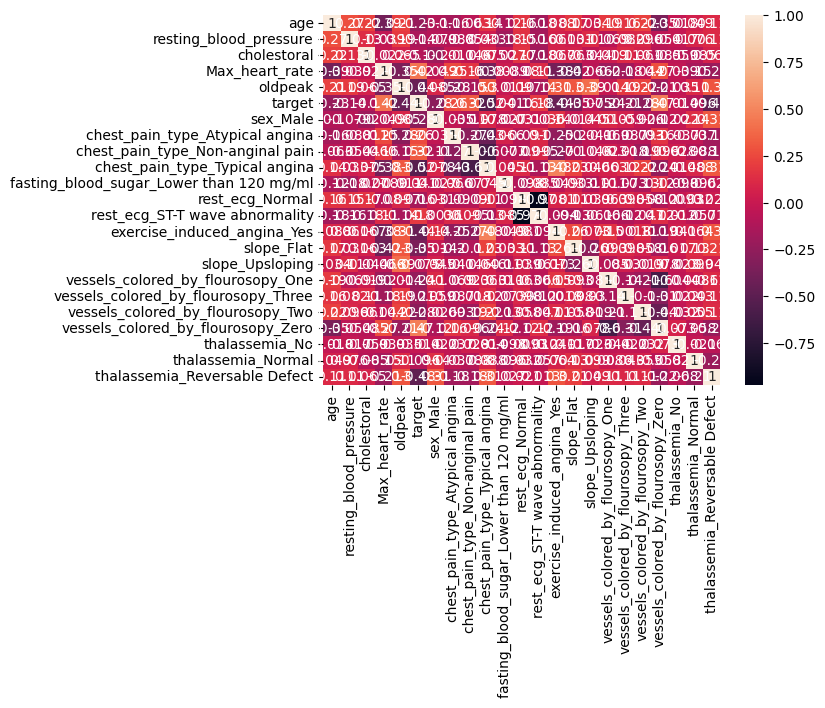

In [11]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Convert categorical columns to numeric using one-hot encoding
categorical_columns = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Calculate the correlation matrix using the encoded data
correlation_matrix = data_encoded.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True)

In [12]:
plt.show()

In [13]:
X = data.drop('target', axis=1)

In [14]:
y = data['target']

In [18]:
# Convert categorical columns to numeric using one-hot encoding for training and testing data
categorical_columns = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [16]:
model = DecisionTreeClassifier()

In [20]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
pred = model.predict(X_test)

In [22]:
print("Accuracy:", accuracy_score(y_test, pred))

Accuracy: 0.9853658536585366


In [23]:
conf_mat = confusion_matrix(y_test, pred)

<Axes: >

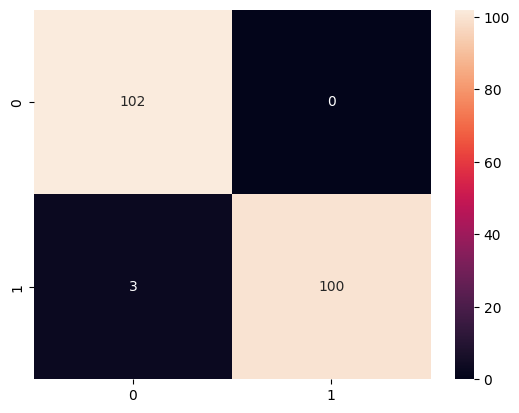

In [24]:
sns.heatmap(conf_mat, annot=True, fmt="d")

In [25]:
plt.show()

In [26]:
from sklearn.metrics import roc_auc_score

In [27]:
roc_auc = roc_auc_score(y_test, pred)

In [28]:
print("ROC AUC:", roc_auc)

ROC AUC: 0.9854368932038835
